In [169]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-testing/Water Quality Testing.csv


In [170]:
#import the required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [171]:
#load the data into dataframe 

df = pd.read_csv("/kaggle/input/water-quality-testing/Water Quality Testing.csv",index_col=0)
df.head()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
Sample ID,,,,,
1,7.25,23.1,4.5,7.8,342
2,7.11,22.3,5.1,6.2,335
3,7.03,21.5,3.9,8.3,356
4,7.38,22.9,3.2,9.5,327
5,7.45,20.7,3.8,8.1,352


## Water Quality testing

Water quality testing is a process used to determine the chemical, physical, and biological characteristics of water samples. It is conducted to assess the suitability of water for various purposes, such as drinking, recreational activities, industrial processes, and environmental monitoring

### pH
pH level is a measure of the acidity or alkalinity of a substance, including water. It is determined by the concentration of hydrogen ions (H+) present in the water. The pH scale ranges from 0 to 14, with 7 considered neutral. Values below 7 indicate acidity, while values above 7 indicate alkalinity

### Temperature
Temperature is a significant parameter in water quality testing and refers to the measure of the average kinetic energy of the water molecules. It is an essential factor that affects various physical, chemical, and biological processes in water

### Turbidity 
Turbidity refers to the measure of the relative clarity or cloudiness of water due to the presence of suspended particles. These particles can be various substances such as silt, clay, organic matter, algae, or other debris

### Dissolved oxygen (DO)
Dissolved oxygen (DO) refers to the amount of oxygen gas dissolved in water. It is a critical parameter in water quality testing and plays a vital role in supporting aquatic life

### Conductivity 
Conductivity is a measure of the ability of water to conduct an electric current. It indicates the presence of dissolved ions in water, which contribute to its overall conductivity. Conductivity is an important parameter in water quality testing and can provide valuable information about the composition and salinity of wate


Check for the Null value

<Axes: ylabel='Sample ID'>

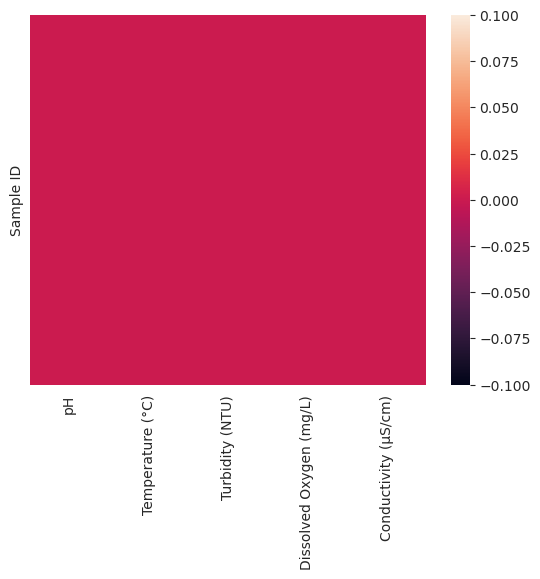

In [172]:
sns.heatmap(df.isnull(),yticklabels=False)

In [173]:
df.isnull().sum()

pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

From the image we can concluse the data frame contains no null value

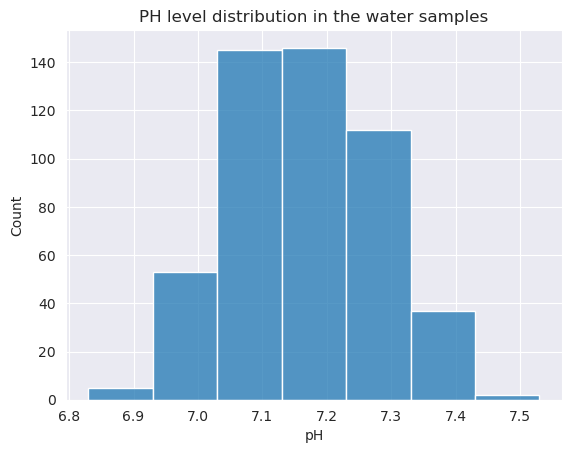

In [174]:
#Check for the Ph distribution is the water qaulity test
sns.set_style("darkgrid")
sns.histplot(data=df,x="pH",binwidth=0.1)
plt.title("PH level distribution in the water samples")
plt.show()

Most of the water sample's pH level falls under 7.0 to 7.4

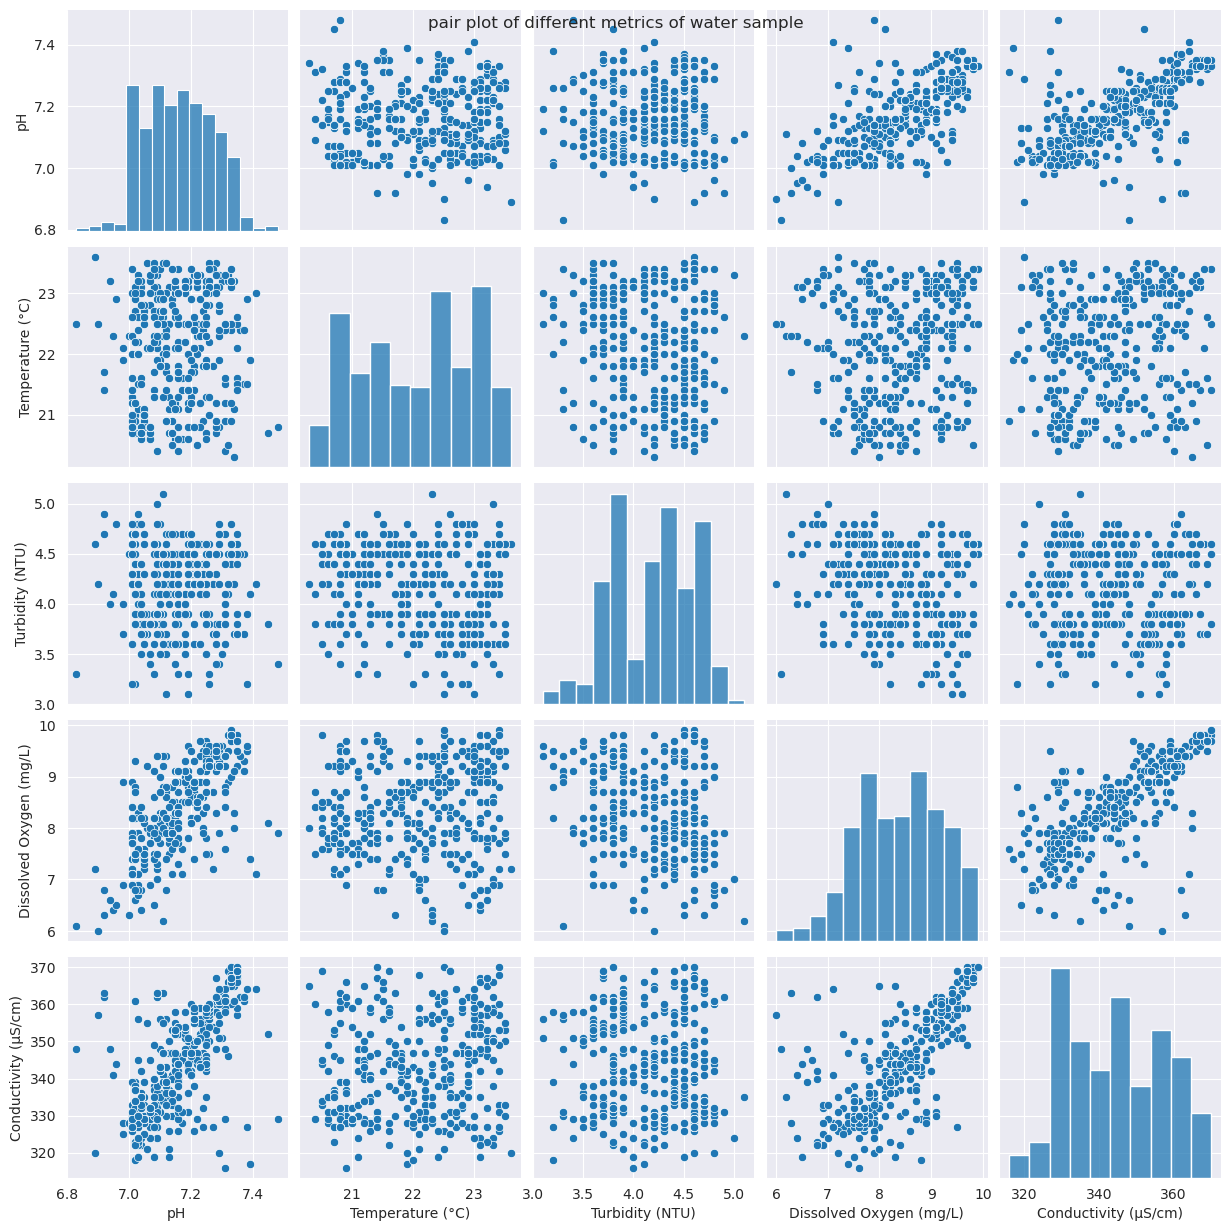

In [175]:
sns.pairplot(df)
plt.suptitle("pair plot of different metrics of water sample")
plt.show()

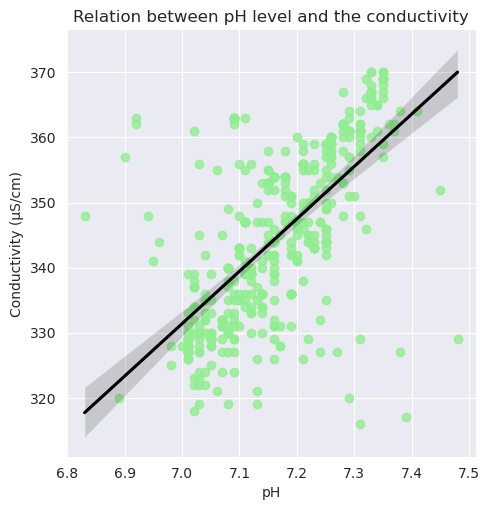

In [176]:
sns.lmplot(data=df,x="pH",y="Conductivity (µS/cm)",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between pH level and the conductivity")
plt.show()

### From the graph we can indentify the increase in pH level cuases the increase in Conductivity 

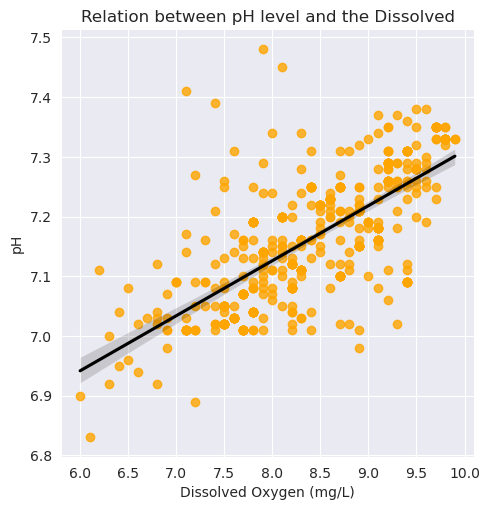

In [177]:
sns.lmplot(data=df,x="Dissolved Oxygen (mg/L)",y="pH",scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.title("Relation between pH level and the Dissolved")
plt.show()

### More Oxygent in water increase the pH level of the water 

## Using the Kmeans Model to classify the water sample into 3 category

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

StandardScaler(copy=True,with_mean=True,with_std=True)

sampled_scaler = scaler.transform(df)

In [179]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

cluster = model.fit_predict(sampled_scaler)

In [180]:
level = pd.Series(cluster)


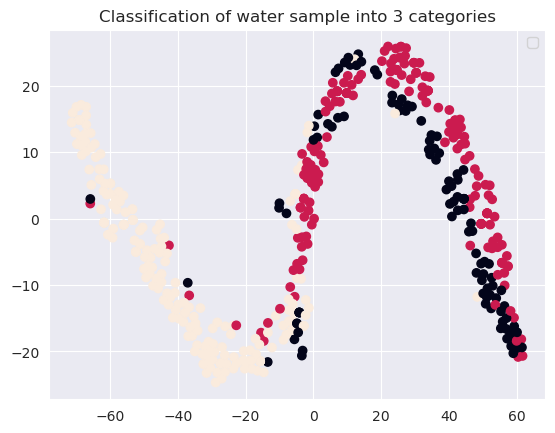

In [181]:
from sklearn.manifold import TSNE

model = TSNE()

transformed_model = model.fit_transform(df)

xs = transformed_model[:,0]
ys =transformed_model[:,1]

plt.scatter(xs,ys,c=level)
plt.title("Classification of water sample into 3 categories")
plt.legend()
plt.show()


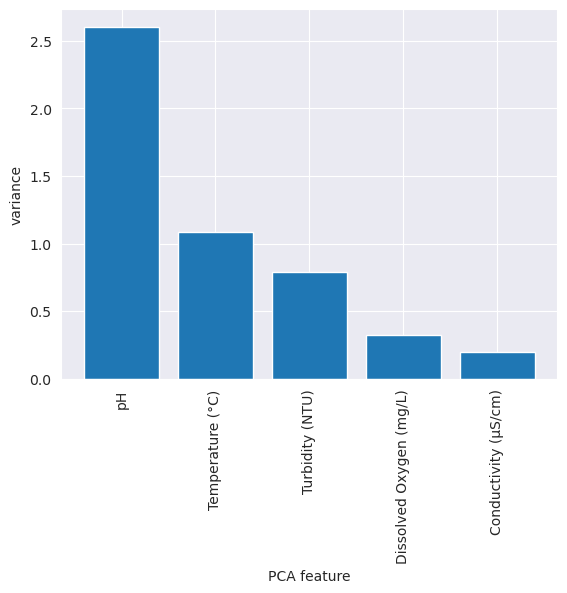

In [182]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features,df.columns)
plt.xticks(rotation=90)
plt.show()


In [183]:
df['classification'] = cluster
df.head()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),classification
Sample ID,,,,,,
1,7.25,23.1,4.5,7.8,342,0
2,7.11,22.3,5.1,6.2,335,0
3,7.03,21.5,3.9,8.3,356,1
4,7.38,22.9,3.2,9.5,327,2
5,7.45,20.7,3.8,8.1,352,2


### Lets rename the sample categories based on the results

In [184]:
df['classification'] = df['classification'].fillna(0)
df['classification'] = df['classification'].astype("int")
df['classification'] = df['classification'].map({0:'category1',1:'category2',2:'category3'})
df['classification'].value_counts()

category3    217
category2    180
category1    103
Name: classification, dtype: int64

## check the distribution of category in the samples

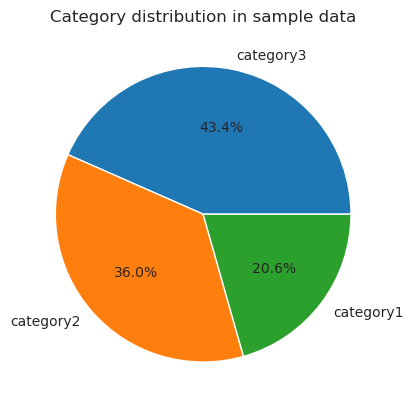

In [185]:
category = df['classification'].value_counts().reset_index(name='counts')
plt.pie(x=category['counts'],labels=category['index'],autopct='%1.1f%%')
plt.title("Category distribution in sample data")
plt.show()

In [186]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df,x="pH",y="Dissolved Oxygen (mg/L)",hue="classification",height=8,aspect=3.7,sie)
plt.title("Oxygen distribution based on pH level")
plt.show()

SyntaxError: positional argument follows keyword argument (705261071.py, line 2)

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.catplot(data=df,y="Turbidity (NTU)",x="classification",kind='box')
plt.title("Turbidity distribution based on pH level")
plt.xlabel("Water sample category")
plt.show()